## Objective:
1. Define a more complex `AgentState`
2. Create a processing node that performs operations on **list data**
3. Set up `LangGraph` that processes and outputs computed results.
4. Invoke the graph with structured inputs and retrieve outputs.

**Main Goal**: Learn how to handle multiple inputs

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  result: str


In [13]:
def process_values(state: AgentState) -> AgentState:
  """This function handle multiple different inputs"""
  state["result"] = f"Hi there {state['name']}. Your sum = {sum(state['values'])}"
  return state

In [15]:
graph = StateGraph(AgentState)

graph.add_node("adding", process_values) 
graph.set_entry_point("adding")
graph.set_finish_point("adding")

app = graph.compile()

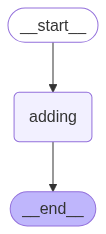

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
response = app.invoke({"values": [1, 2, 3, 4], "name": "Ashik"})
# LangGraph automatically add None, if you didn't pass the value

In [18]:
print(response)
print(response['result'])

{'values': [1, 2, 3, 4], 'name': 'Ashik', 'result': 'Hi there Ashik. Your sum = 10'}
Hi there Ashik. Your sum = 10


### Task:
Create a **Graph** where you pass in a single list of integers along with a name and an operation. If the operation is a "+", you add the elements and if it is a "*", you multiply the elements, **all within the same node.**

**Input**: {"name": "Ashik", "values": [1, 2, 3, 4], "operation": "*"}
**Output**: "Hi Ashik, your answer is: 24"

In [22]:
import math

In [25]:
class OperationState(TypedDict):
  name: str
  values: List[int]
  operation: str
  output: str


def operation_node(state: OperationState) -> OperationState:
  """It can give you result based on your operator"""
  if state["operation"] == "+":
    result = sum(state["values"])
  elif state["operation"] == "*":
    result = math.prod(state["values"])
  else:
    result = "Invalid operation"

  state["output"] = f"Hi {state['name']}, your answer is: {result}" 
  return state  

In [26]:
graph2 = StateGraph(OperationState)

graph2.add_node("operator", operation_node)
graph2.set_entry_point("operator")
graph2.set_finish_point("operator")

app2 = graph2.compile()

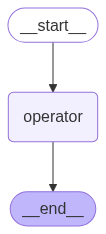

In [27]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [28]:
response = app2.invoke({"name": "Ashik", "values": [1, 2, 3, 4], "operation": "*", "output": ""})

In [29]:
response["output"]

'Hi Ashik, your answer is: 24'